# Análisis sobre Kendo

In [72]:
import json
import matplotlib.pyplot as plt
from pathlib import Path

In [73]:
folder = Path('players/')
files = folder.glob('*.json')

#for file in files:
#    try:
#        with open(file, 'r', encoding='utf-8') as f:
#            datas = json.load(f)
#            print(f'Contendio de {file.name}: {datas}')
#    except json.JSONDecodeError as e:
#        print(f'Contendio erróneo de {file.name}: {e}')

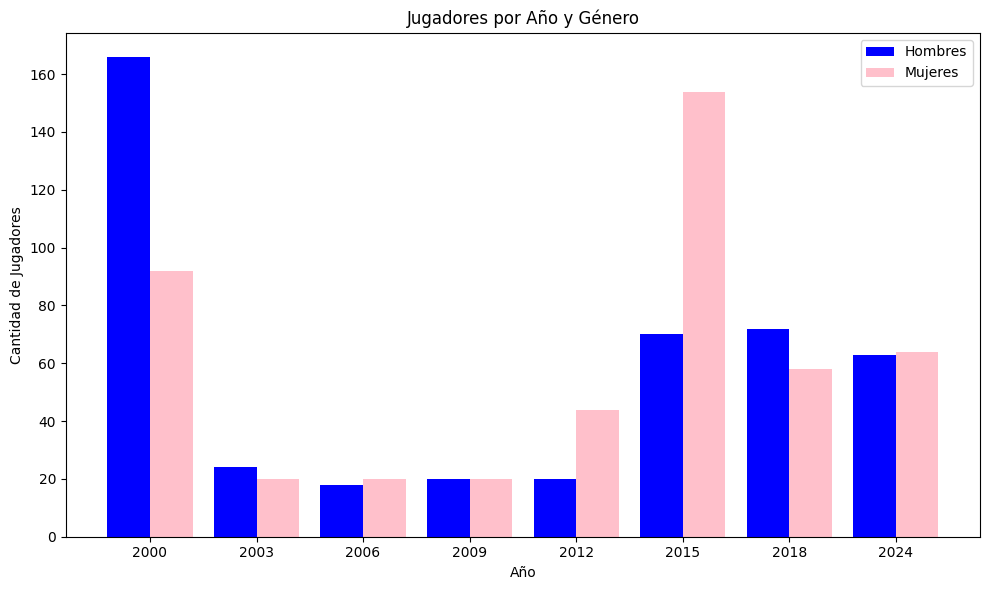

In [86]:
folder = Path("players/")
files = folder.glob("*.json")

year_gender_counts = {
    "2000": {"male": 0, "female": 0},
    "2003": {"male": 0, "female": 0},
    "2006": {"male": 0, "female": 0},
    "2009": {"male": 0, "female": 0},
    "2012": {"male": 0, "female": 0},
    "2015": {"male": 0, "female": 0},
    "2018": {"male": 0, "female": 0},
    "2024": {"male": 0, "female": 0},
}

for file in files:
    with open(file, "r", encoding="utf-8") as f:
        data = json.load(f)
        for player in data:
            year = player.get("year")
            gender = player.get("gender")

            if year in year_gender_counts and gender in ["male", "female"]:
                year_gender_counts[year][gender] += 1

years = sorted(year_gender_counts.keys())
male_counts = [year_gender_counts[year]["male"] for year in years]
female_counts = [year_gender_counts[year]["female"] for year in years]

bar_width = 0.4
x = range(len(years))

plt.figure(figsize=(10, 6))
plt.bar(x, male_counts, width=bar_width, label="Hombres", color="blue", align="center")
plt.bar(
    [i + bar_width for i in x], 
    female_counts, 
    width=bar_width, 
    label="Mujeres", 
    color="pink", 
    align="center"
)
plt.xlabel("Año")
plt.ylabel("Cantidad de Jugadores")
plt.title("Jugadores por Año y Género")
plt.xticks([i + bar_width/2 for i in x], years)
plt.legend()
plt.tight_layout()
plt.show()